In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn import metrics

In [2]:
def List_conversion(l1):
    temp = []
    for i in l1:
        if type(i) == 'list':
            for j in i:
                temp.append(j)
        else:
            temp.append(i)
    return temp

In [9]:
def cast():
    cd = pd.read_csv('P_cast.csv')
    dis = cd.sort_values('Location')
    general = []
    obc = []
    sc= []
    st = []
    total = []
    temp = 0
    for i in range(len(cd)):
        if cd['Social Category'][i] == 'General':
            sg = cd['Overall'][i] + cd['Overall.1'][i] + cd['Overall.2'][i]
            temp = temp + sg
            general.append(sg)
            sg= 0
        if cd['Social Category'][i] == 'OBC':
            so = cd['Overall'][i] + cd['Overall.1'][i] + cd['Overall.2'][i]
            temp = temp + so
            obc.append(so)
            so=0
        if cd['Social Category'][i] == 'SC':
            ssc = cd['Overall'][i] + cd['Overall.1'][i] + cd['Overall.2'][i]
            temp = temp + ssc
            sc.append(ssc)
            ssc = 0
        if cd['Social Category'][i] == 'ST':
            sst = cd['Overall'][i] + cd['Overall.1'][i] + cd['Overall.2'][i]
            temp = temp + sst 
            st.append(sst)
            total.append(temp)
            temp = 0
            sst =0
            
    CombinationForTheCast =  list(zip(general,obc,sc,st , total))
    Cast = pd.DataFrame(CombinationForTheCast , columns=['general' , 'obc' , 'sc' , 'st' , 'overall' ])
    
    # Prediction Part
    print()
    x = Cast[['overall']]     # d
    y = Cast[['general' , 'obc' , 'sc' , 'st']] # i
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=135,test_size=0.1 , train_size=0.9)
    # mean of the all cast use in Random_state
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    prediction = lm.predict(x_test)    
    print(f'Co-efficients : {List_conversion(lm.coef_)}')
    print(f'Intercept : {List_conversion(lm.intercept_)}')
    
    # User input for the Prediction 
    # it return the General , Obc , sc , st all cast Predicted value
    print()
    value = Cast['overall'].sum() / len(Cast)
    l1 = [value]
    Final_data = lm.predict([l1]).tolist()
    print(f'GENERAL : {Final_data[0][0]} \nOBC : {Final_data[0][1]} \nSC : {Final_data[0][2]} \nST : {Final_data[0][3]}')
    
    # Errors form the data set
    print()
    print("r2_error : ", metrics.r2_score(y_test , prediction))
    print("Mean" , metrics.mean_absolute_error(y_test , prediction))
    
    print(Cast.columns)
    
    Cast['general'].plot()
    Cast['obc'].plot()
    Cast['general'].plot()
    Cast['general'].plot()


Co-efficients : [array([0.20061358]), array([0.21801433]), array([0.27858077]), array([0.30279132])]
Intercept : [-2.8733911119742004, 6.002919646481182, -2.6267982266183267, -0.5027303078887186]

GENERAL : 24.196194385679913 
OBC : 35.420457946710904 
SC : 34.963210181157905 
ST : 40.354103003692686

r2_error :  0.07356685138594418
Mean 11.085708781089036
Index(['general', 'obc', 'sc', 'st', 'overall'], dtype='object')


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


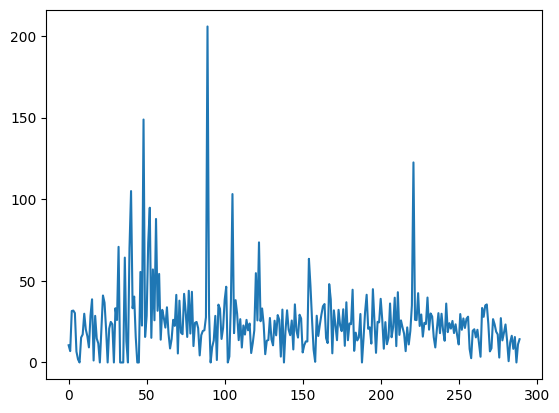

In [8]:
cast()

In [7]:
def gender():
    dd = pd.read_csv('P_cast.csv')
    boys=[]
    girls = []
    overall = []
    for i in range(len(dd)):
        Gtemp = dd['Girls'][i] + dd['Girls.1'][i] + dd['Girls.2'][i]
        Btemp = dd['Boys'][i] + dd['Boys.1'][i] + dd['Boys.2'][i]
        Otemp = Gtemp + Btemp
        girls.append(Gtemp)
        boys.append(Btemp)
        overall.append(Otemp)
    GenderData = list(zip(boys,girls,overall))
    final_Gender_Data = pd.DataFrame(GenderData , columns=['Male' , 'Female' , 'Overall'])
    
    # Prediction of the value 
    x = final_Gender_Data[['Overall']]
    y = final_Gender_Data[['Male' , 'Female']]
    x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=67 , train_size=0.8 , test_size =  0.2)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    print(f'Co-efficients : {List_conversion(lm.coef_)}')
    print(f'Intercept : {List_conversion(lm.intercept_)}')

    # user input for the prediction value 
    obj = sum(final_Gender_Data['Overall']) / len(final_Gender_Data)
    ol = [obj]
    pre = lm.predict([ol]).tolist()
    print(f'Male : {pre[0][0]} \nFemale : {pre[0][1]}')
    

In [8]:
def schoolgroup():
    sd = pd.read_csv('dropout.csv')
    sd.sort_values('Location' , inplace= True)
    
    # primary Data
    primary = sd[['Location' , 'primary_Overall']]
    AHMEDABAD = []
    AMRELI = []
    ANAND = []
    ARAVALLI = []
    BANAS_KANTHA = []
    BHARUCH =[] 
    BHAVNAGAR =[]
    BOTAD =[] 
    CHHOTAUDEPUR =[]
    DEVBHOOMI_DWARKA = []
    DOHAD = []
    GANDHINAGAR = []
    GIR_SOMNATH = []
    JAMNAGAR = []
    JUNAGADH = [] 
    KACHCHH = []
    KHEDA = []
    MAHESANA = []
    MAHISAGAR = []
    MORBI = []
    NARMADA =[] 
    NAVSARI = []
    PANCH_MAHALS = []
    PATAN = []
    PORBANDAR = []
    RAJKOT = []
    SABAR_KANTHA = []
    SURENDRANAGAR = []
    SURAT = []
    TAPI =[] 
    THE_DANGS = []
    VADODARA = []
    VALSAD = []
    for i in range(len(primary)):
        if primary['Location'][i] == 'AHMEDABAD':
            AHMEDABAD.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'AMRELI':
            AMRELI.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'ANAND':
            ANAND.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'ARAVALLI':
            ARAVALLI.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'BANAS KANTHA':
            BANAS_KANTHA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'BHARUCH':
            BHARUCH.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'BHAVNAGAR':
            BHAVNAGAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'BOTAD':
            BOTAD.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'CHHOTAUDEPUR':
            CHHOTAUDEPUR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'DEVBHOOMI DWARKA':
            DEVBHOOMI_DWARKA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'DOHAD':
            DOHAD.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'GANDHINAGAR':
            GANDHINAGAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'GIR SOMNATH':
            GIR_SOMNATH.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'JAMNAGAR':
            JAMNAGAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'JUNAGADH':
            JUNAGADH.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'KACHCHH':
            KACHCHH.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'KHEDA':
            KHEDA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'MAHESANA':
            MAHESANA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'MAHISAGAR':
            MAHISAGAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'MORBI':
            MORBI.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'NARMADA':
            NARMADA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'NAVSARI':
            NAVSARI.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'PANCH MAHALS':
            PANCH_MAHALS.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'PATAN':
            PATAN.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'PORBANDAR':
            PORBANDAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'RAJKOT':
            RAJKOT.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'SABAR KANTHA':
            SABAR_KANTHA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'SURAT':
            SURAT.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'SURENDRANAGAR':
            SURENDRANAGAR.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'TAPI':
            TAPI.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'THE DANGS':
            THE_DANGS.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'VADODARA':
            VADODARA.append(primary['primary_Overall'][i])
        if primary['Location'][i] == 'VALSAD':
            VALSAD.append(primary['primary_Overall'][i])        
        City = ['AHMEDABAD','AMRELI','ANAND','ARAVALLI','BANAS_KANTHA','BHARUCH' ,'BHAVNAGAR','BOTAD' ,'CHHOTAUDEPUR','DEVBHOOMI_DWARKA','DOHAD','GANDHINAGAR','GIR_SOMNATH','JAMNAGAR','JUNAGADH' ,'KACHCHH','KHEDA','MAHESANA','MAHISAGAR','MORBI','NARMAD' ,'NAVSARI','PANCH_MAHALS','PATAN','PORBANDAR','RAJKOT','SABAR_KANTHA','SURAT','SURENDRANAGAR','TAP' ,'THE_DANGS','VADODARA','VALSAD']
        sum_for_primary = [sum(AHMEDABAD),sum(AMRELI),sum(ANAND),sum(ARAVALLI),sum(BANAS_KANTHA),sum(BHARUCH) ,sum(BHAVNAGAR),sum(BOTAD) ,sum(CHHOTAUDEPUR),sum(DEVBHOOMI_DWARKA),sum(DOHAD),sum(GANDHINAGAR),sum(GIR_SOMNATH),sum(JAMNAGAR),sum(JUNAGADH) ,sum(KACHCHH),sum(KHEDA),sum(MAHESANA),sum(MAHISAGAR),sum(MORBI),sum(NARMADA),sum(NAVSARI),sum(PANCH_MAHALS),sum(PATAN),sum(PORBANDAR),sum(RAJKOT),sum(SABAR_KANTHA),sum(SURAT),sum(SURENDRANAGAR),sum(TAPI),sum(THE_DANGS),sum(VADODARA),sum(VALSAD)]
        List_data  = list(zip(City , sum_for_primary))
        School_data = pd.DataFrame(List_data  , columns=['City' , 'Primary'])
        
    # upper Primary Data
    upper = sd[['Location' , 'upper_Overall']]
    AHMEDABAD_U = []
    AMRELI_U = []
    ANAND_U = []
    ARAVALLI_U = []
    BANAS_KANTHA_U = []
    BHARUCH_U = [] 
    BHAVNAGAR_U = []
    BOTAD_U = [] 
    CHHOTAUDEPUR_U = []
    DEVBHOOMI_DWARKA_U = []
    DOHAD_U = []
    GANDHINAGAR_U = []
    GIR_SOMNATH_U = []
    JAMNAGAR_U = []
    JUNAGADH_U = [] 
    KACHCHH_U = []
    KHEDA_U = []
    MAHESANA_U = []
    MAHISAGAR_U = []
    MORBI_U = []
    NARMADA_U = [] 
    NAVSARI_U = []
    PANCH_MAHALS_U = []
    PATAN_U = []
    PORBANDAR_U = []
    RAJKOT_U = []
    SABAR_KANTHA_U = []
    SURENDRANAGAR_U = []
    SURAT_U = []
    TAPI_U = [] 
    THE_DANGS_U = []
    VADODARA_U = []
    VALSAD_U = []
    for i in range(len(upper)):
        if upper['Location'][i] == 'AHMEDABAD':
            AHMEDABAD_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'AMRELI':
            AMRELI_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'ANAND':
            ANAND_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'ARAVALLI':
            ARAVALLI_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'BANAS KANTHA':
            BANAS_KANTHA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'BHARUCH':
            BHARUCH_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'BHAVNAGAR':
            BHAVNAGAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'BOTAD':
            BOTAD_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'CHHOTAUDEPUR':
            CHHOTAUDEPUR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'DEVBHOOMI DWARKA':
            DEVBHOOMI_DWARKA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'DOHAD':
            DOHAD_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'GANDHINAGAR':
            GANDHINAGAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'GIR SOMNATH':
            GIR_SOMNATH_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'JAMNAGAR':
            JAMNAGAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'JUNAGADH':
            JUNAGADH_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'KACHCHH':
            KACHCHH_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'KHEDA':
            KHEDA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'MAHESANA':
            MAHESANA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'MAHISAGAR':
            MAHISAGAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'MORBI':
            MORBI_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'NARMADA':
            NARMADA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'NAVSARI':
            NAVSARI_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'PANCH MAHALS':
            PANCH_MAHALS_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'PATAN':
            PATAN_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'PORBANDAR':
            PORBANDAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'RAJKOT':
            RAJKOT_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'SABAR KANTHA':
            SABAR_KANTHA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'SURAT':
            SURAT_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'SURENDRANAGAR':
            SURENDRANAGAR_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'TAPI':
            TAPI_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'THE DANGS':
            THE_DANGS_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'VADODARA':
            VADODARA_U.append(upper['upper_Overall'][i])
        if upper['Location'][i] == 'VALSAD':
            VALSAD_U.append(upper['upper_Overall'][i])    
    sum_for_upper = [sum(AHMEDABAD_U),sum(AMRELI_U),sum(ANAND_U),sum(ARAVALLI_U),sum(BANAS_KANTHA_U),sum(BHARUCH_U) ,sum(BHAVNAGAR_U),sum(BOTAD_U) ,sum(CHHOTAUDEPUR_U),sum(DEVBHOOMI_DWARKA_U),sum(DOHAD_U),sum(GANDHINAGAR_U),sum(GIR_SOMNATH_U),sum(JAMNAGAR_U),sum(JUNAGADH_U) ,sum(KACHCHH_U),sum(KHEDA_U),sum(MAHESANA_U),sum(MAHISAGAR_U),sum(MORBI_U),sum(NARMADA_U),sum(NAVSARI_U),sum(PANCH_MAHALS_U),sum(PATAN_U),sum(PORBANDAR_U),sum(RAJKOT_U),sum(SABAR_KANTHA_U),sum(SURAT_U),sum(SURENDRANAGAR_U),sum(TAPI_U),sum(THE_DANGS_U),sum(VADODARA_U),sum(VALSAD_U)]
    School_data['upper'] =sum_for_upper
    
    # for Secondary
    second = sd[['Location' , 'second_Overall']]
    AHMEDABAD_S = []
    AMRELI_S = []
    ANAND_S = []
    ARAVALLI_S = []
    BANAS_KANTHA_S = []
    BHARUCH_S = [] 
    BHAVNAGAR_S = []
    BOTAD_S = [] 
    CHHOTAUDEPUR_S = []
    DEVBHOOMI_DWARKA_S = []
    DOHAD_S = []
    GANDHINAGAR_S = []
    GIR_SOMNATH_S = []
    JAMNAGAR_S = []
    JUNAGADH_S = [] 
    KACHCHH_S = []
    KHEDA_S = []
    MAHESANA_S = []
    MAHISAGAR_S = []
    MORBI_S = []
    NARMADA_S = [] 
    NAVSARI_S = []
    PANCH_MAHALS_S = []
    PATAN_S = []
    PORBANDAR_S = []
    RAJKOT_S = []
    SABAR_KANTHA_S = []
    SURENDRANAGAR_S = []
    SURAT_S = []
    TAPI_S = [] 
    THE_DANGS_S = []
    VADODARA_S = []
    VALSAD_S = []
    for i in range(len(second)):
        if second['Location'][i] == 'AHMEDABAD':
            AHMEDABAD_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'AMRELI':
            AMRELI_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'ANAND':
            ANAND_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'ARAVALLI':
            ARAVALLI_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'BANAS KANTHA':
            BANAS_KANTHA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'BHARUCH':
            BHARUCH_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'BHAVNAGAR':
            BHAVNAGAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'BOTAD':
            BOTAD_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'CHHOTAUDEPUR':
            CHHOTAUDEPUR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'DEVBHOOMI DWARKA':
            DEVBHOOMI_DWARKA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'DOHAD':
            DOHAD_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'GANDHINAGAR':
            GANDHINAGAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'GIR SOMNATH':
            GIR_SOMNATH_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'JAMNAGAR':
            JAMNAGAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'JUNAGADH':
            JUNAGADH_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'KACHCHH':
            KACHCHH_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'KHEDA':
            KHEDA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'MAHESANA':
            MAHESANA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'MAHISAGAR':
            MAHISAGAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'MORBI':
            MORBI_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'NARMADA':
            NARMADA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'NAVSARI':
            NAVSARI_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'PANCH MAHALS':
            PANCH_MAHALS_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'PATAN':
            PATAN_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'PORBANDAR':
            PORBANDAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'RAJKOT':
            RAJKOT_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'SABAR KANTHA':
            SABAR_KANTHA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'SURAT':
            SURAT_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'SURENDRANAGAR':
            SURENDRANAGAR_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'TAPI':
            TAPI_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'THE DANGS':
            THE_DANGS_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'VADODARA':
            VADODARA_S.append(second['second_Overall'][i])
        if second['Location'][i] == 'VALSAD':
            VALSAD_S.append(second['second_Overall'][i])    
    sum_for_second = [sum(AHMEDABAD_S),sum(AMRELI_S),sum(ANAND_S),sum(ARAVALLI_S),sum(BANAS_KANTHA_S),sum(BHARUCH_S) ,sum(BHAVNAGAR_S),sum(BOTAD_S) ,sum(CHHOTAUDEPUR_S),sum(DEVBHOOMI_DWARKA_S),sum(DOHAD_S),sum(GANDHINAGAR_S),sum(GIR_SOMNATH_S),sum(JAMNAGAR_S),sum(JUNAGADH_S) ,sum(KACHCHH_S),sum(KHEDA_S),sum(MAHESANA_S),sum(MAHISAGAR_S),sum(MORBI_S),sum(NARMADA_S),sum(NAVSARI_S),sum(PANCH_MAHALS_S),sum(PATAN_S),sum(PORBANDAR_S),sum(RAJKOT_S),sum(SABAR_KANTHA_S),sum(SURAT_S),sum(SURENDRANAGAR_S),sum(TAPI_S),sum(THE_DANGS_S),sum(VADODARA_S),sum(VALSAD_S)]
    School_data['second'] = sum_for_second
    
    # overall Data
    total = []
    temp = 0 
    for i  in range(len(School_data)):
        f1 = School_data['Primary'][i] + School_data['upper'][i] + School_data['second'][i]
        total.append(f1)
    School_data['Overall'] = total
    
    # prediction Model Working
    x = School_data[['Overall']]
    y = School_data[['Primary', 'upper', 'second']]
    x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=911 , train_size=0.8 , test_size=0.2 )
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    print(f'Co-efficients : {List_conversion(lm.coef_)}')
    print(f'Intercept : {List_conversion(lm.intercept_)}')
    
    # prediction from the user input 
    obj = sum(School_data['Overall']) / len(School_data)
    l1 = [obj]
    pre = lm.predict([l1]).tolist()
    if pre[0][0] < 0 :
        pre[0][0] = 0
    if  pre[0][1] < 0 :
        pre[0][1] = 0
    if pre[0][2] < 0 :
        pre[0][2] = 0
    print("Input : ")
    print(f"Pre-primary : {pre[0][1]} \nUpper-primary : {pre[0][1]} \nSecondary : {pre[0][2]}")
    
    

In [9]:
schoolgroup()

Co-efficients : [array([0.0983714]), array([0.32353855]), array([0.57809006])]
Intercept : [-17.33517512437699, -112.87031819240141, 130.20549331677842]
Input : 
Pre-primary : 181.9995774698841 
Upper-primary : 181.9995774698841 
Secondary : 657.0711639560895


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
def district():
    dd = pd.read_csv('P_cast.csv')
    AHMEDABAD = []
    AMRELI = []
    ANAND = []
    ARAVALLI = []
    BANAS_KANTHA = []
    BHARUCH =   [] 
    BHAVNAGAR = []
    BOTAD = [] 
    CHHOTAUDEPUR = []
    DEVBHOOMI_DWARKA = []
    DOHAD = []
    GANDHINAGAR = []
    GIR_SOMNATH = []
    JAMNAGAR = []
    JUNAGADH = [] 
    KACHCHH = []
    KHEDA = []
    MAHESANA = []
    MAHISAGAR = []
    MORBI = []
    NARMADA = [] 
    NAVSARI = []
    PANCH_MAHALS = []
    PATAN = []
    PORBANDAR = []
    RAJKOT = []
    SABAR_KANTHA = []
    SURENDRANAGAR = []
    SURAT = []
    TAPI =  [] 
    THE_DANGS = []
    VADODARA = []
    VALSAD = []
    for i in range(len(dd)):
        if dd['Location'][i] == 'AHMEDABAD':
            AHMEDABAD.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'AMRELI':
            AMRELI.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'ANAND':
            ANAND.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'ARAVALLI':
            ARAVALLI.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'BANAS KANTHA':
            BANAS_KANTHA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'BHARUCH':
            BHARUCH.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'BHAVNAGAR':
            BHAVNAGAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'BOTAD':
            BOTAD.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'CHHOTAUDEPUR':
            CHHOTAUDEPUR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'DEVBHOOMI DWARKA':
            DEVBHOOMI_DWARKA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'DOHAD':
            DOHAD.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'GANDHINAGAR':
            GANDHINAGAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'GIR SOMNATH':
            GIR_SOMNATH.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'JAMNAGAR':
            JAMNAGAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'JUNAGADH':
            JUNAGADH.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'KACHCHH':
            KACHCHH.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'KHEDA':
            KHEDA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'MAHESANA':
            MAHESANA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'MAHISAGAR':
            MAHISAGAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'MORBI':
            MORBI.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'NARMADA':
            NARMADA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'NAVSARI':
            NAVSARI.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'PANCH MAHALS':
            PANCH_MAHALS.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'PATAN':
            PATAN.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'PORBANDAR':
            PORBANDAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'RAJKOT':
            RAJKOT.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'SABAR KANTHA':
            SABAR_KANTHA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'SURAT':
            SURAT.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'SURENDRANAGAR':
            SURENDRANAGAR.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'TAPI':
            TAPI.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'THE DANGS':
            THE_DANGS.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'VADODARA':
            VADODARA.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])
        if dd['Location'][i] == 'VALSAD':
            VALSAD.append([dd['Boys'][i] , dd['Boys.1'][i] , dd['Boys.2'][i] ,dd['Girls'][i] ,dd['Girls.1'][i], dd['Girls.1'][i]])        
        dic = {'AHMEDABAD' : sum(List_con(AHMEDABAD)) ,'AMRELI' : sum(List_con(AMRELI)) ,'ANAND' : sum(List_con(ANAND)) ,'ARAVALLI' : sum(List_con(ARAVALLI)) ,'BANAS_KANTHA' : sum(List_con(BANAS_KANTHA)) ,'BHARUCH' : sum(List_con(BHARUCH))  ,'BHAVNAGAR' : sum(List_con(BHAVNAGAR)) ,'BOTAD' : sum(List_con(BOTAD))  ,'CHHOTAUDEPUR' : sum(List_con(CHHOTAUDEPUR)) ,'DEVBHOOMI_DWARKA' : sum(List_con(DEVBHOOMI_DWARKA)) ,'DOHAD' : sum(List_con(DOHAD)) ,'GANDHINAGAR' : sum(List_con(GANDHINAGAR)) ,'GIR_SOMNATH' : sum(List_con(GIR_SOMNATH)) ,'JAMNAGAR' : sum(List_con(JAMNAGAR)) ,'JUNAGADH' : sum(List_con(JUNAGADH))  ,'KACHCHH' : sum(List_con(KACHCHH)) ,'KHEDA' : sum(List_con(KHEDA)) ,'MAHESANA' : sum(List_con(MAHESANA)) ,'MAHISAGAR' : sum(List_con(MAHISAGAR)) ,'MORBI' : sum(List_con(MORBI)) ,'NARMADA' : sum(List_con(NARMADA))  ,'NAVSARI' : sum(List_con(NAVSARI)) ,'PANCH_MAHALS' : sum(List_con(PANCH_MAHALS)) ,'PATAN' : sum(List_con(PATAN)) ,'PORBANDAR' : sum(List_con(PORBANDAR)) ,'RAJKOT' : sum(List_con(RAJKOT)) ,'SABAR_KANTHA' : sum(List_con(SABAR_KANTHA)) ,'SURENDRANAGAR' : sum(List_con(SURENDRANAGAR)) ,'SURAT' : sum(List_con(SURAT)) ,'TAPI' : sum(List_con(TAPI))  ,'THE_DANGS' : sum(List_con(THE_DANGS)) ,'VADODARA' : sum(List_con(VADODARA)) ,'VALSAD' : sum(List_con(VALSAD)) }
        ddata = pd.DataFrame(dic , index=['Overall']).T  

In [11]:
gender()

Co-efficients : [array([0.48510918]), array([0.51489082])]
Intercept : [1.741126414792383, -1.7411264147923902]
Male : 34.4904829981256 
Female : 33.018767001874444


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
cast()


Co-efficients : [array([0.20061358]), array([0.21801433]), array([0.27858077]), array([0.30279132])]
Intercept : [-2.8733911119742004, 6.002919646481182, -2.6267982266183267, -0.5027303078887186]

GENERAL : 24.196194385679913 
OBC : 35.420457946710904 
SC : 34.963210181157905 
ST : 40.354103003692686

r2_error :  0.07356685138594418
Mean 11.085708781089036


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
schoolgroup()

Co-efficients : [array([0.0983714]), array([0.32353855]), array([0.57809006])]
Intercept : [-17.33517512437699, -112.87031819240141, 130.20549331677842]
Input : 
Pre-primary : 181.9995774698841 
Upper-primary : 181.9995774698841 
Secondary : 657.0711639560895


C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
